# Задание лабораторной работы

- Выбрать набор данных (датасет) для решения задачи классификации или регресии.
- В случае необходимости произвести удаление или заполнение пропусков и кодирование категориальных признаков.
- С использованием метода train_test_split разделить выборку на обучающую и тестовую.
- Обучить следующие ансамблевые модели: одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья); одну из моделей группы бустинга; одну из моделей группы стекинга.
- Дополнительно к указанным моделям обучить еще две модели: модель многослойного персептрона; модель МГУА.
- Оценить качество моделей с помощью одной из подходящих для задачи метрик. Сравнить качество полученных моделей.

## Выбор и загрузка данных

В качестве датасета будем использовать набор данных, содержащий данные о различных стёклах. Данный набор доступен по адресу: https://www.kaggle.com/datasets/uciml/glass

Набор данных имеет следующие атрибуты:

- RI - Refractive Index - коэффициент преломления
- Na - Sodium - Содержание натрия (массовый процент в соответствующем оксиде)
- Mg - Magnesium - Содержание магния
- Al - Aluminum - Содержание алюминия
- Si - Silicon - Содержание кремния
- K -  Potassium - Содержание калия
- Ca - Calcium - Содержание кальция
- Ba - Barium - Содеражние бария
- Fe - Iron - Содержание железа
- Type - Type of glass - тип стекла (1, 2 - стекла для зданий, 3, 4 - стекла для автомобилей, 5 - стеклотара, 6 - бытовые стекла, 7 - стекла для ламп; 4 отсутствует в данном наборе данных)

### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

Уберем предупреждения:

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

Загрузим набор данных:

In [4]:
!unzip "archive(2).zip"

Archive:  archive(2).zip
  inflating: glass.csv               


In [5]:
data = pd.read_csv('glass.csv')

## Первичный анализ и обработка данных

Выведем первые 5 строк датасета:

In [6]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Определим размер датасета:

In [7]:
data.shape

(214, 10)

In [8]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

### Разделение данных

In [10]:
X = data.drop("Type", axis=1)
y = data["Type"]

Будем решать задачу регрессии - отображения новых предсказанных записей.

In [11]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Размеры обучающей выборки и тестовой выборки:

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 9), (160,), (54, 9), (54,))

## Обучение моделей

### Модель бэггинга

In [13]:
from sklearn.ensemble import BaggingRegressor

In [14]:
bagging_model = BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)
bagging_model.fit(X_train, y_train)

BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)

Сконвертируем объекты, которые были использованы в обучающей выборке каждого дерева, в двоичную матрицу (1 соответствует элементам, попавшим в обучающую выборку):

In [15]:
bin_array = np.zeros((5, X_train.shape[0]))
for i in range(5):
    for j in bagging_model.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,

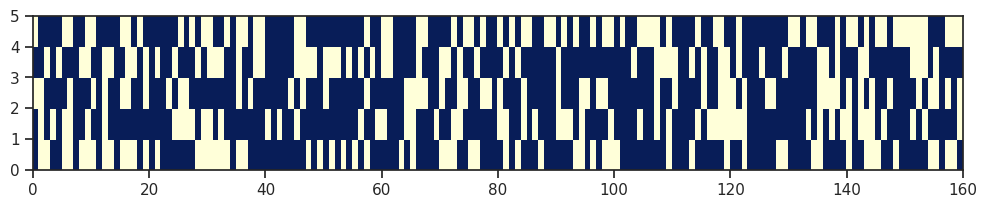

In [16]:
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

Оценим Out-of-bag error

ошибки набора тестов:

In [17]:
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели 1 размер OOB составляет 38.12%
Для модели 2 размер OOB составляет 35.0%
Для модели 3 размер OOB составляет 34.38%
Для модели 4 размер OOB составляет 36.88%
Для модели 5 размер OOB составляет 42.5%


In [18]:
from io import StringIO
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

In [19]:
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

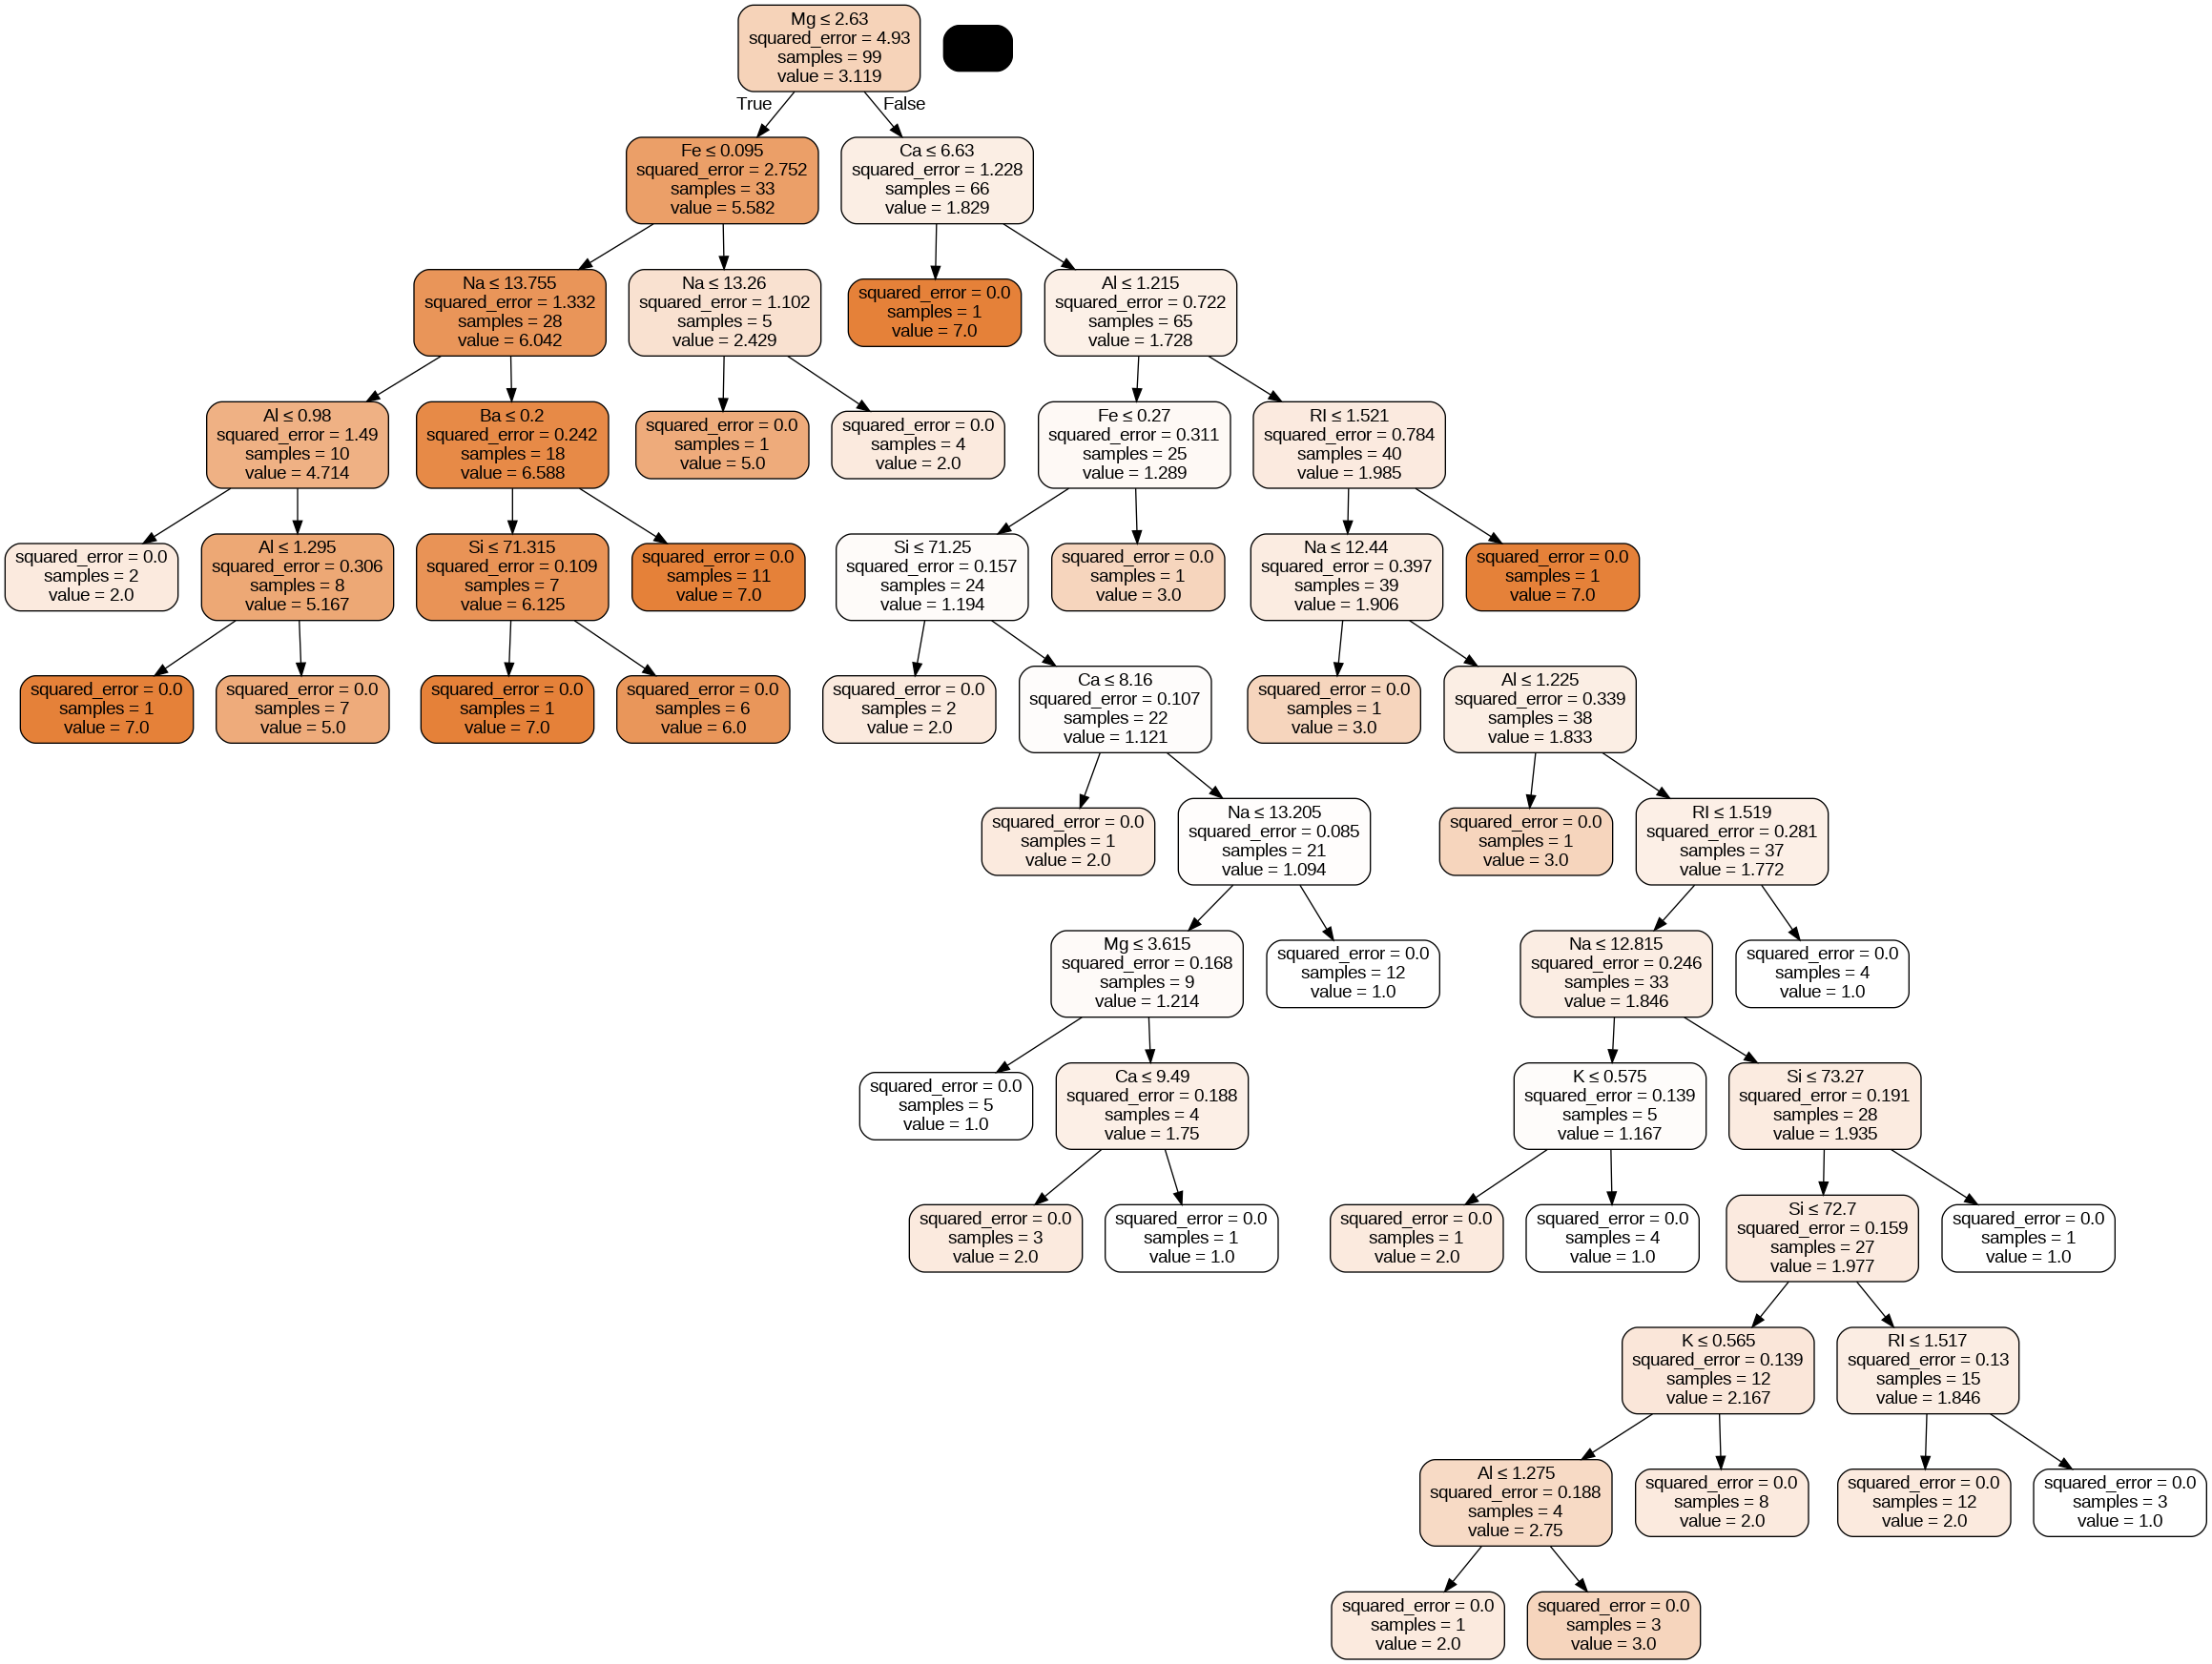

In [20]:
Image(get_png_tree(bagging_model.estimators_[0], X.columns))

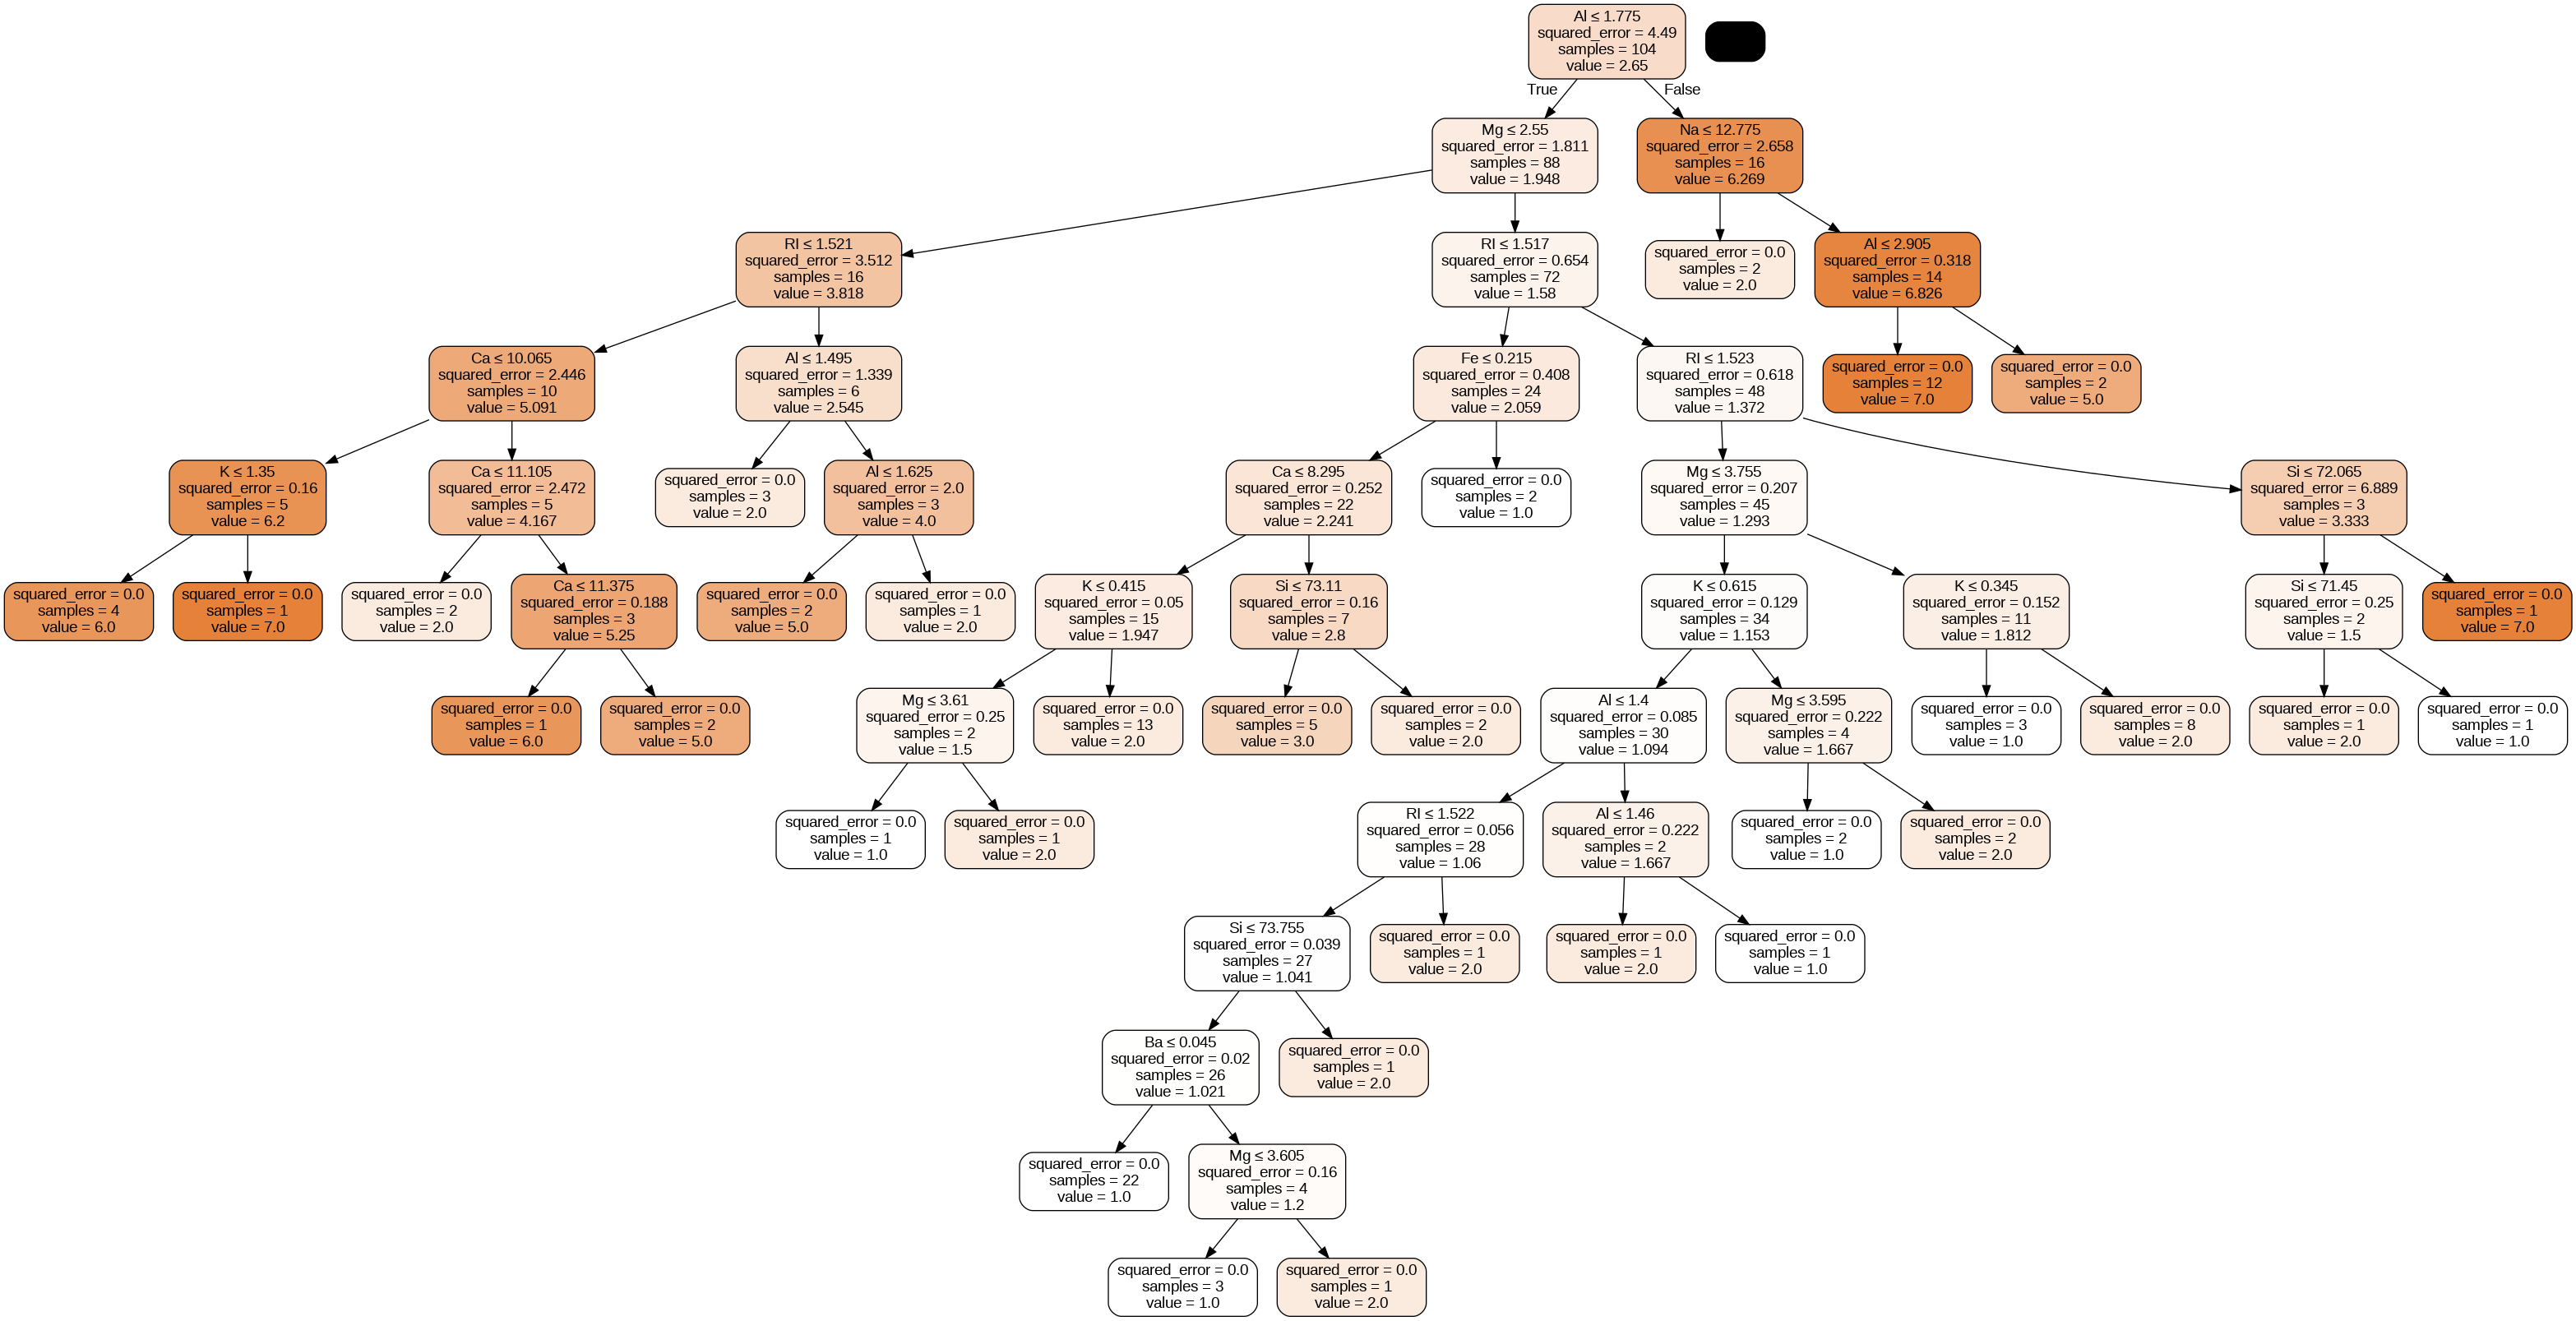

In [21]:
Image(get_png_tree(bagging_model.estimators_[1], X.columns))

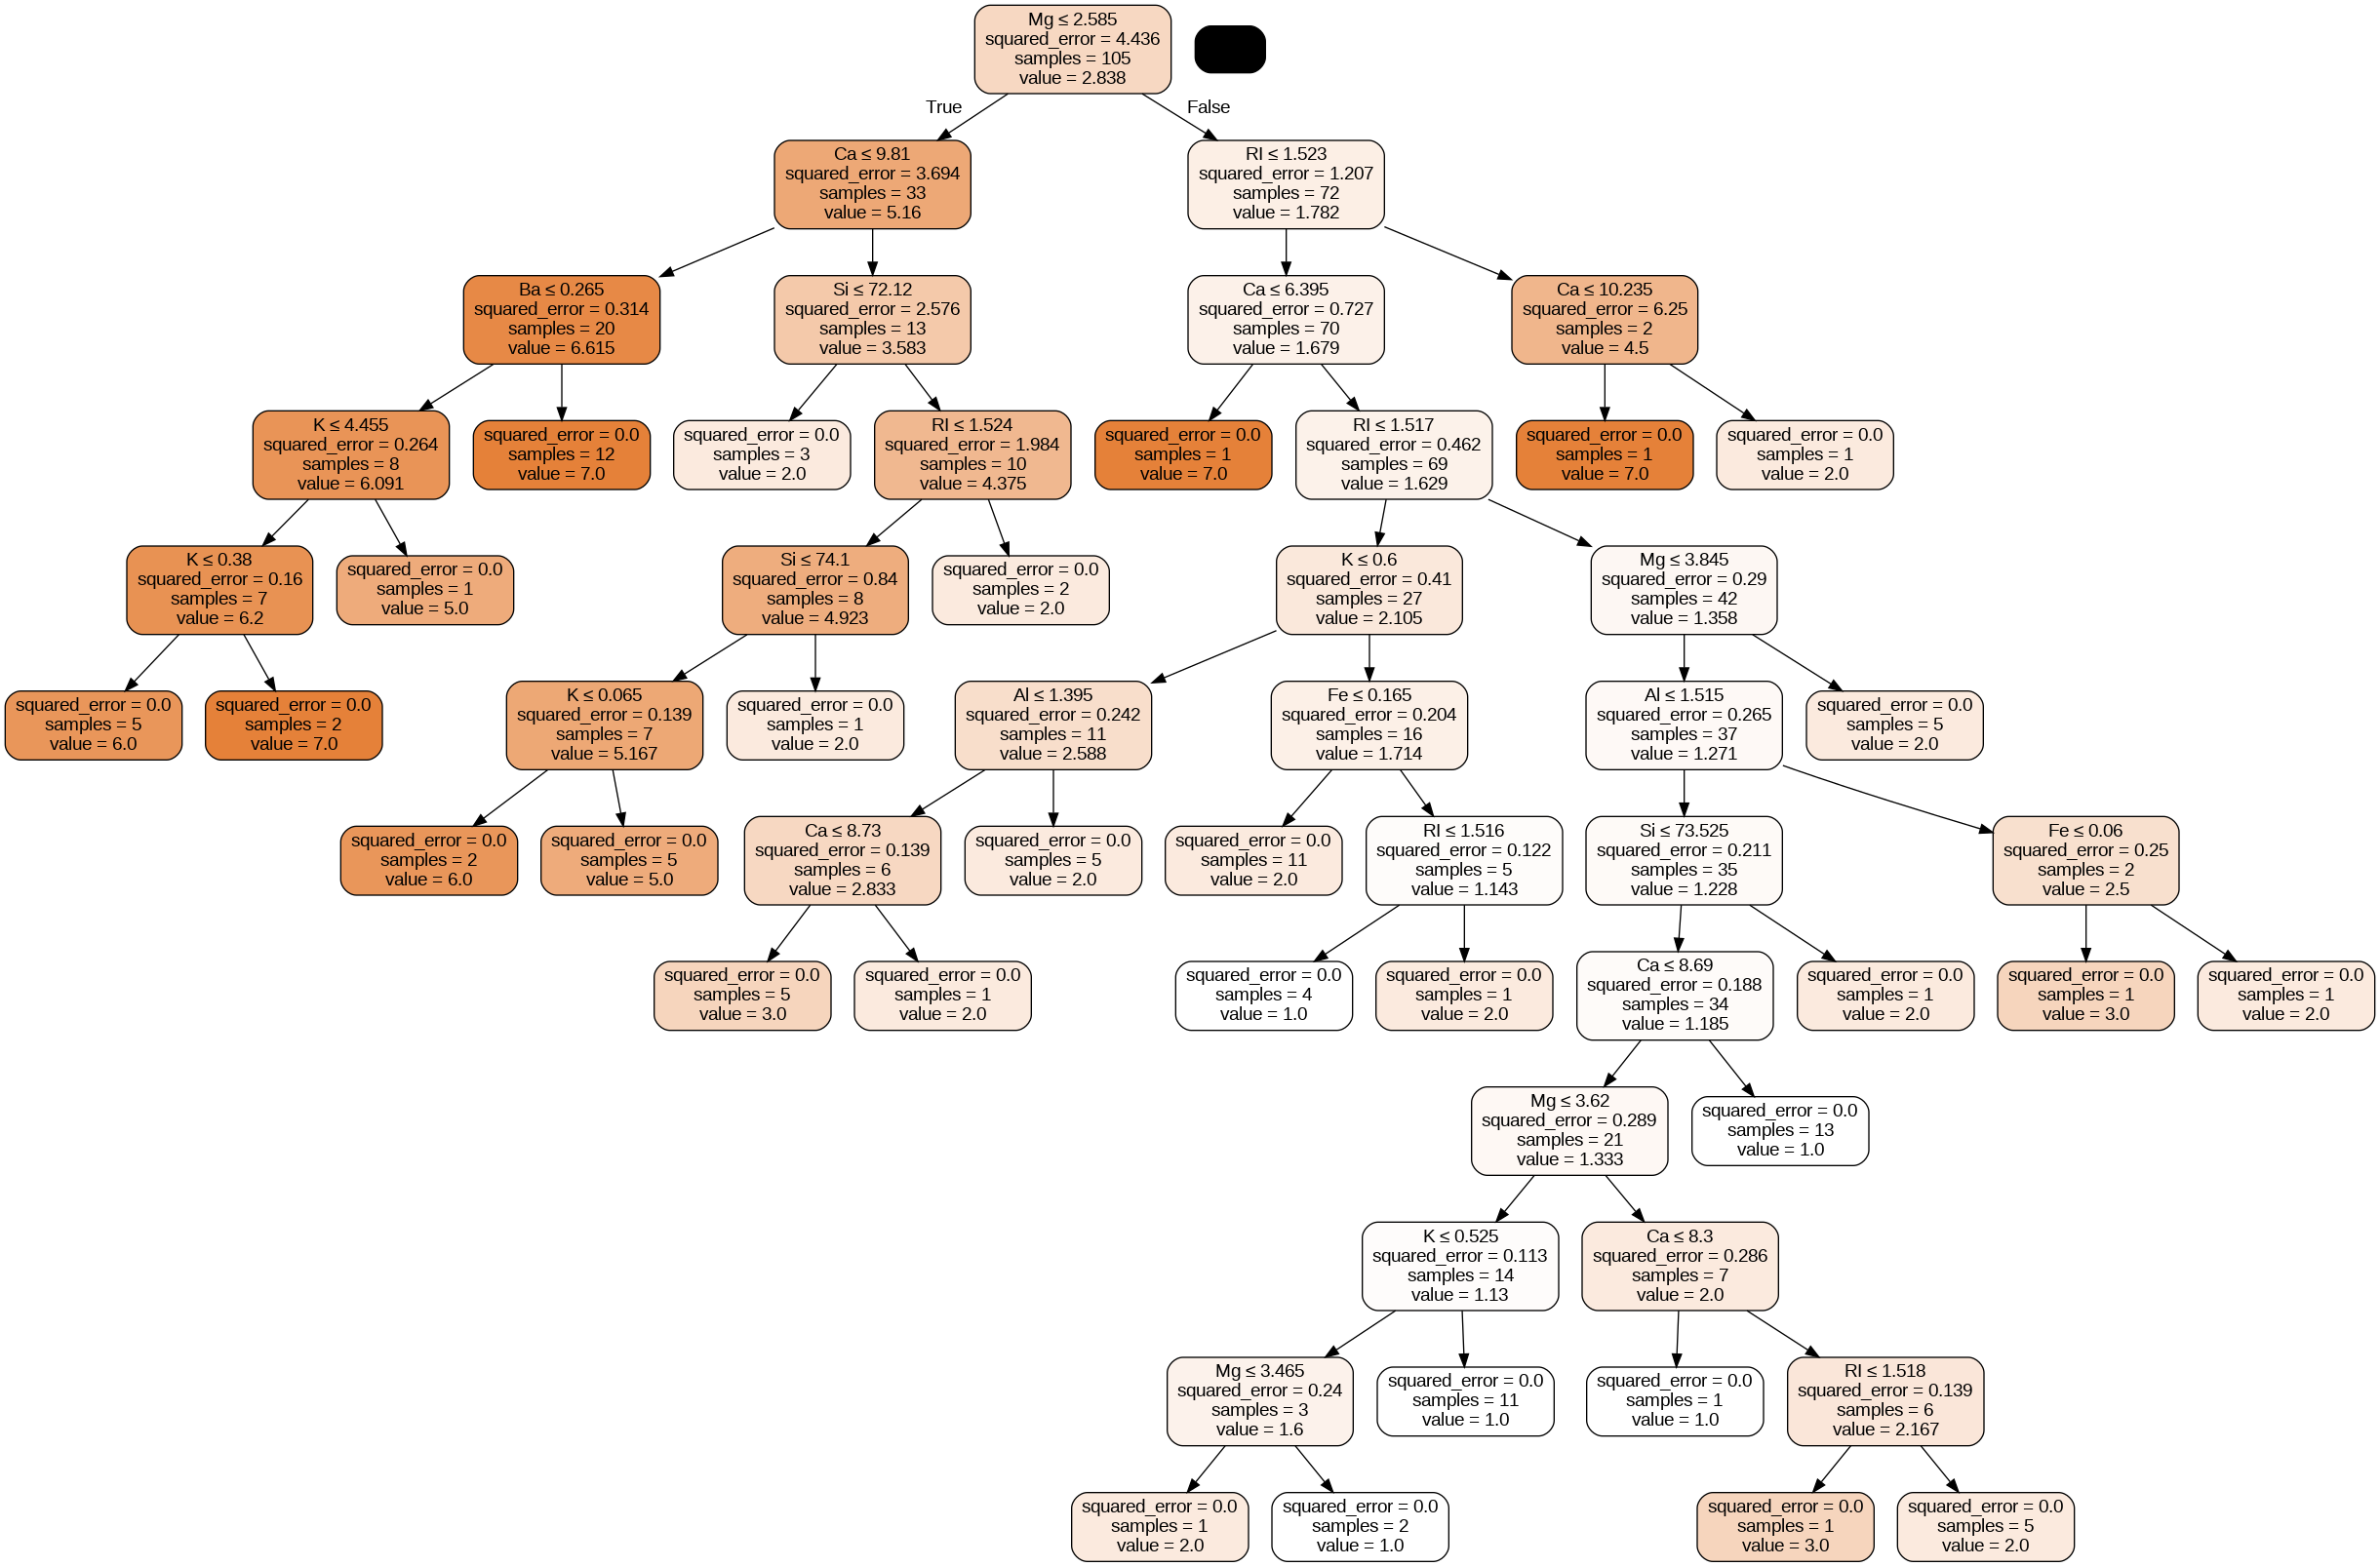

In [22]:
Image(get_png_tree(bagging_model.estimators_[2], X.columns))

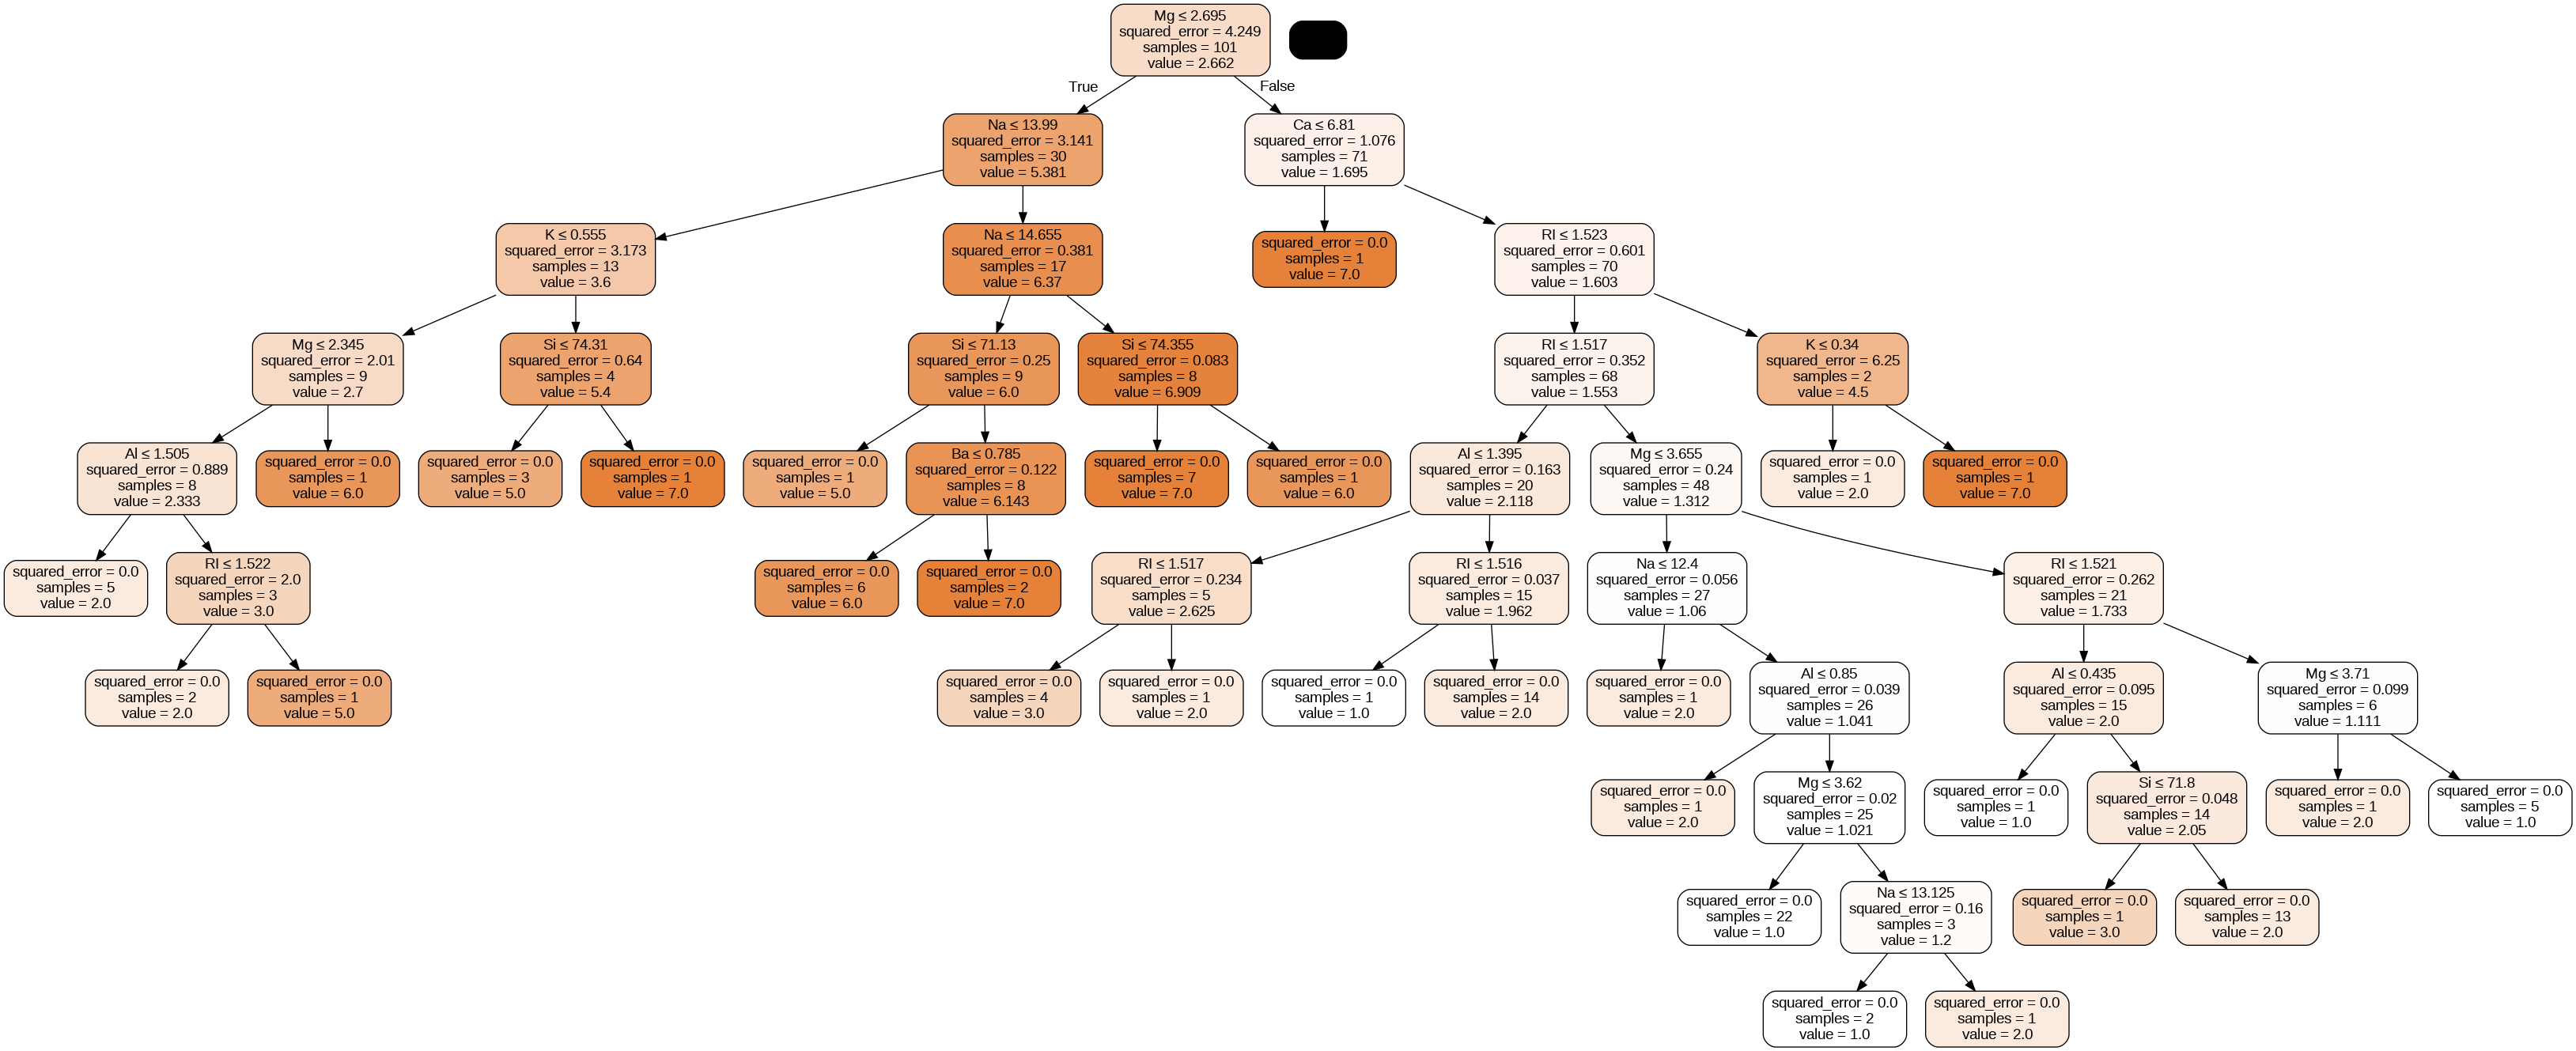

In [23]:
Image(get_png_tree(bagging_model.estimators_[3], X.columns))

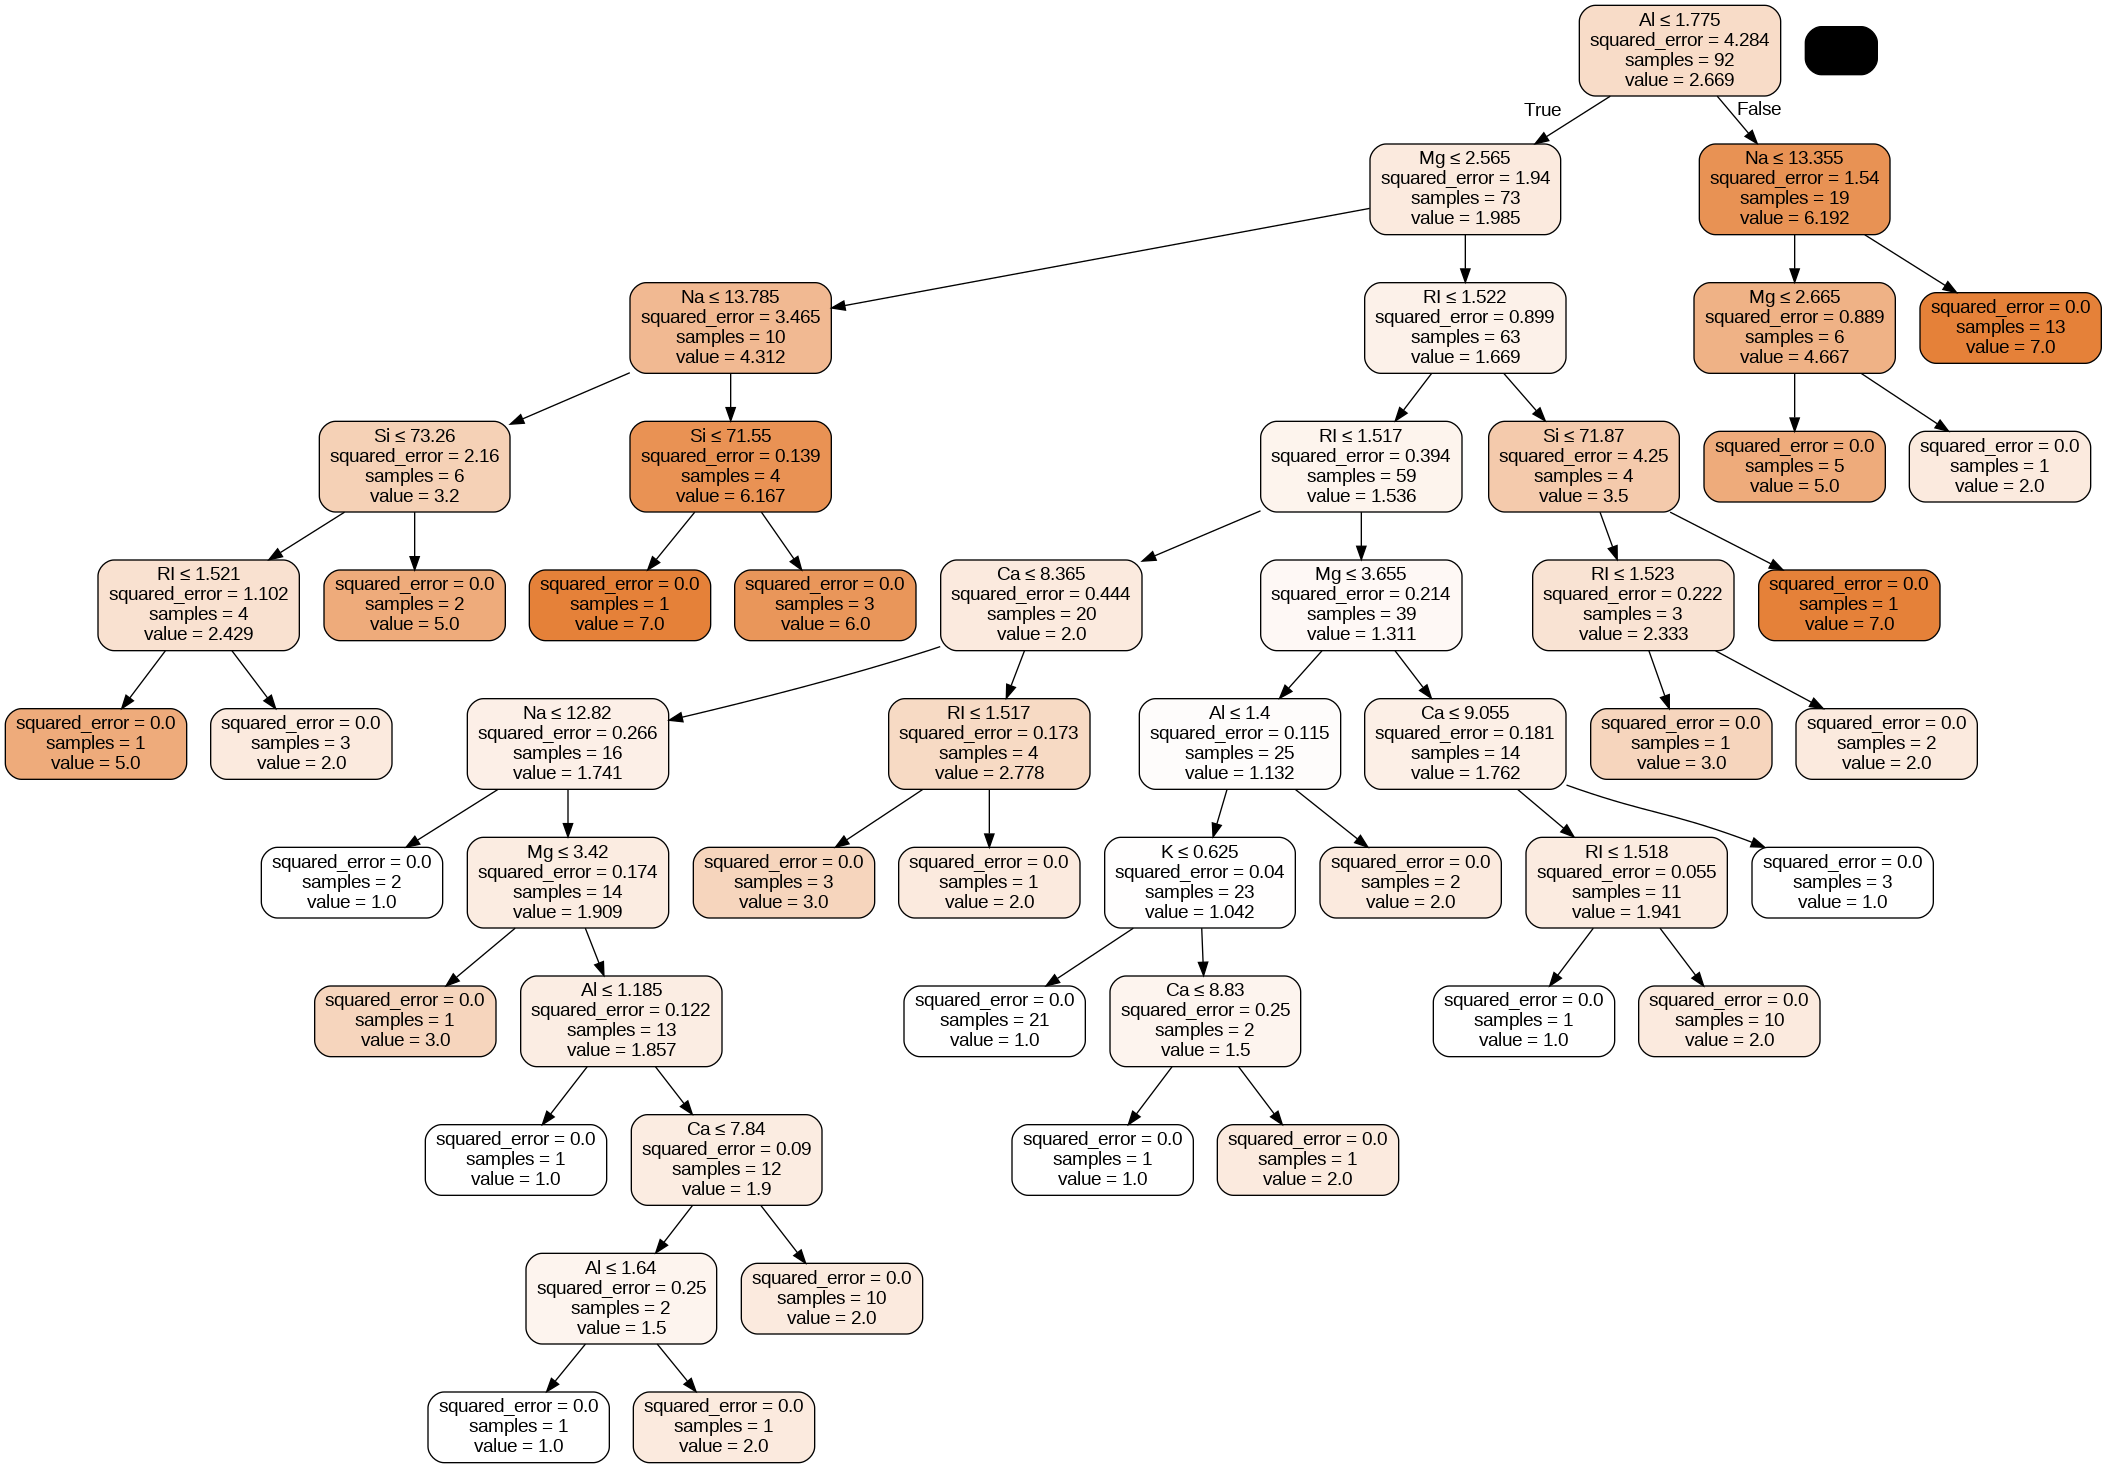

In [24]:
Image(get_png_tree(bagging_model.estimators_[4], X.columns))

Визуализируем результаты регрессии:

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(X2, y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = X2[:, 0], X2[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Na')
    ax.set_ylabel('Si')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

Оставим только два признака - Na и Si:

In [27]:
X2 = X[['Na', 'Si']].to_numpy()

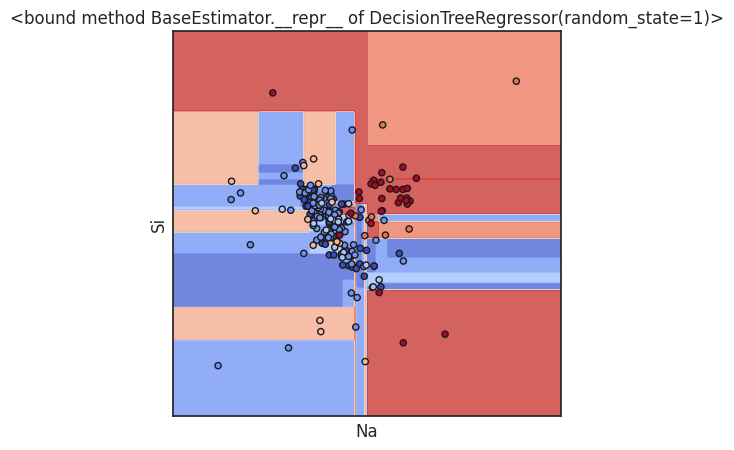

In [28]:
plot_cl(DecisionTreeRegressor(random_state=1))

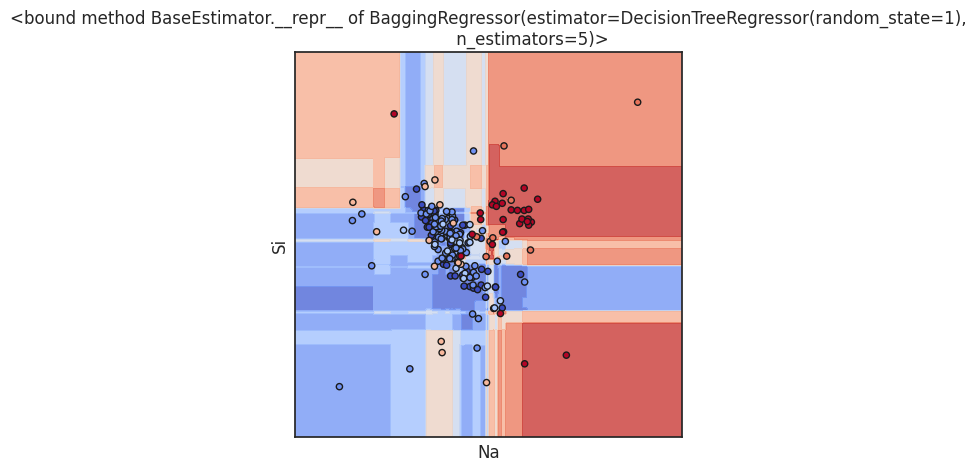

In [29]:
plot_cl(BaggingRegressor(DecisionTreeRegressor(random_state=1), n_estimators=5))

### Модель градиентного бустинга

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

Обучим модель на 5 деревьях:

In [31]:
gradient_model = GradientBoostingRegressor(n_estimators=5)
gradient_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=5)

Для визуализации регрессии будем использовать функцию plot_cl из визуализации регрессии модели бэггинга:

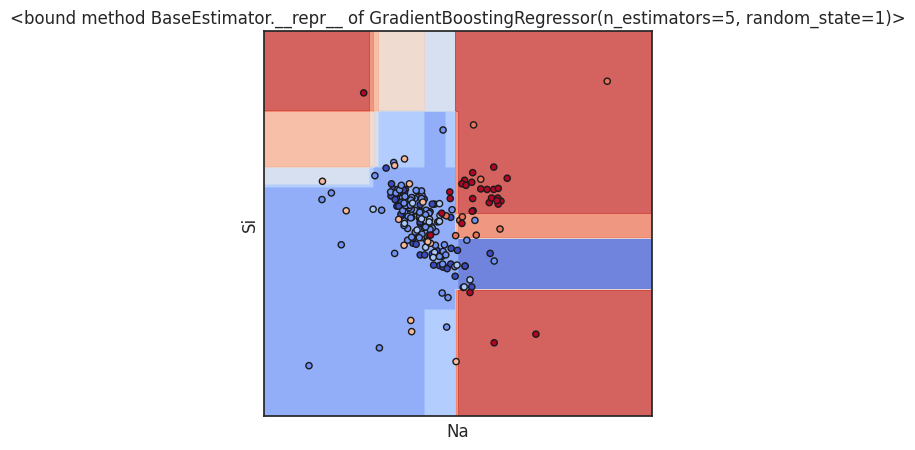

In [32]:
plot_cl(GradientBoostingRegressor(random_state=1, n_estimators=5))

### Модель стекинга

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Реализуем модель стекинга через библиотеку heamy:

In [35]:
!pip install heamy

  Preparing metadata (setup.py) ... done
  Created wheel for heamy: filename=heamy-0.0.7-py2.py3-none-any.whl size=15347 sha256=f9118bdc8d5b66d2de9041b52ead19e6a293a50adb467e1aedc1d2325d3379d0
  Stored in directory: /root/.cache/pip/wheels/e5/e4/9a/bc85119b96421369998ff0f53c0854b57bfb518c460fe8c5de
Successfully built heamy


In [36]:
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset

In [43]:
dataset = Dataset(X_train, y_train, X_test, y_test)

Построим модели дерева, линейную модель и случайного леса для задачи регрессии:

In [49]:
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 5}, name='rf')

Определим их качество:

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
def val_mae(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print(model)
    print("MAE = {}".format(result))

In [50]:
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=5)
]:
    val_mae(model)
    print()

LinearRegression()
MAE = 0.7674795585626123

DecisionTreeRegressor()
MAE = 0.5740740740740741

RandomForestRegressor(n_estimators=5)
MAE = 0.562962962962963



1: на первом уровне - дерево и линейная регрессия, а на втором - линейная регрессия:

In [51]:
pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)

stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.9256781672040049, 0.6472772749913172, 1.135145915527881, 0.7992838987646265, 0.7270705329154766, 0.6045703734218015, 0.8374480589311797, 0.9251449677291228, 0.9089071002797209, 0.7575107779864547]
Mean accuracy: 0.8268037067751586
Standard Deviation: 0.14781721808739537
Variance: 0.021849929963096603


2: на первом уровне - дерево и стохастический градиентный спуск, а на втором - случайный лес:

In [52]:
stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.8268749999999999, 0.570625, 1.2962500000000001, 0.909375, 0.858125, 0.8887499999999999, 0.889375, 0.9674999999999999, 0.6275, 0.710625]
Mean accuracy: 0.8545
Standard Deviation: 0.19154711398243518
Variance: 0.036690296875000014


3: на первом уровне - дерево, линейная регрессия и случайный лес, а на втором - линейная регрессия:

In [53]:
pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds3 = pipeline.stack(k=10, seed=1)

stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [1.0256604413132144, 0.5315352157583192, 0.7890008301891098, 0.6778737435146385, 0.4934877322357393, 0.34887804012056395, 0.6400892198622412, 0.8637256454536884, 0.6492364661968486, 0.49568934946177157]
Mean accuracy: 0.6515176684106135
Standard Deviation: 0.18973391238602594
Variance: 0.03599895750930816


4: на первом уровне - дерево, линейная регрессия и случайный лес, а на втором - случайный лес:

In [54]:
stacker = Regressor(dataset=stack_ds3, estimator=RandomForestRegressor)
results = stacker.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [1.0175, 0.538125, 0.8849999999999999, 0.711875, 0.6668749999999999, 0.546875, 0.765625, 1.013125, 0.63875, 0.48062499999999997]
Mean accuracy: 0.7264375
Standard Deviation: 0.18252719189548172
Variance: 0.03331617578125001


Выведем результаты:

In [55]:
array_labels = ['LR','TREE', 'RF', 'TREE+LR=>LR',
                'TREE+LR=>RF', 'TREE+LR+RF=>LR', 'TREE+LR+RF=>RF']
array_mae = [0.7674795585626123, 0.5740740740740741, 0.562962962962963,
             0.8268037067751586, 0.8545, 0.6515176684106135,
             0.7264375]

In [56]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5,
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

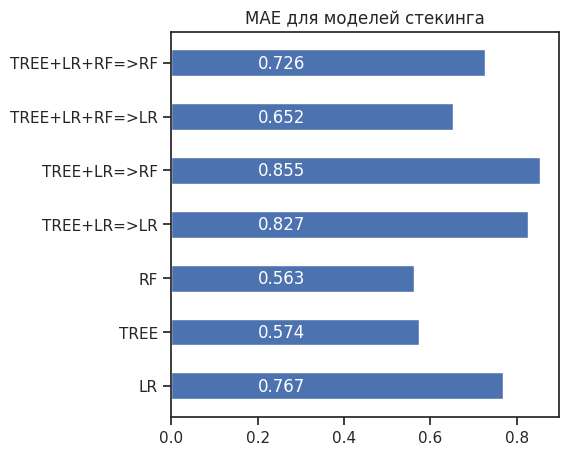

In [57]:
vis_models_quality(array_mae, array_labels, 'MAE для моделей стекинга')

Чем ближе значение MAE к нулю, тем лучше качество регрессии.

Лучший результат у исходных моделей - у модели дерева, а у моделей стекинга - у эксперимента 4, где на первом уровне располагаются дерево, линейная регрессия и случайный лес, а на втором - случайный лес.

Эту модель и будем использовать для дальнейшей оценки качества:

In [58]:
stacking_model = Regressor(dataset=stack_ds3, estimator=RandomForestRegressor)

## Обучение дополнительных моделей

### Модель многослойного персептрона

Обучим модель многослойного персептрона:

In [59]:
from sklearn.neural_network import MLPRegressor

In [60]:
perceptron_model = MLPRegressor(solver='lbfgs', alpha=1e-5,
                 hidden_layer_sizes=(5, 2), random_state=1)
perceptron_model.fit(X_train, y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
             solver='lbfgs')

### !


Также обучим модель МГУА с помощью библиотеки GmdhPy:

In [77]:
!pip install gmdhpy

In [ ]:
!pip install git+git://github.com/kvoyager/GmdhPy.git

  Cloning git://github.com/kvoyager/GmdhPy.git to /tmp/pip-req-build-_mc43zul
  Running command git clone --filter=blob:none --quiet git://github.com/kvoyager/GmdhPy.git /tmp/pip-req-build-_mc43zul


In [89]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [90]:
from GmdhPy import Regressor
model = Regressor()
model.fit(data_x, data_y)
predict_y = model.predict(test_x)

ModuleNotFoundError: No module named 'GmdhPy'

In [87]:
from gmdhpy import Regressor

ImportError: cannot import name 'Regressor' from 'gmdhpy' (/usr/local/lib/python3.10/dist-packages/gmdhpy/__init__.py)

In [73]:
multilayered_model = Regressor()
multilayered_model.fit(X_train.values, y_train.values)

TypeError: BaseEstimator.__init__() missing 1 required positional argument: 'dataset'

## Оценка качества полученных моделей

Для оценки качества полученных моделей будем использовать метрику "Средняя абсолютная ошибка" (mean_absolute_error).

Чем ближе её значение к нулю, тем лучше качество регрессии.

Посчитаем метрику для всех моделей:

In [ ]:
mean_absolute_error(y_test, bagging_model.predict(X_test))

In [ ]:
mean_absolute_error(y_test, gradient_model.predict(X_test))

In [ ]:
results = stacking_model.validate(k=10, scorer=mean_absolute_error)

In [ ]:
mean_absolute_error(y_test, perceptron_model.predict(X_test))

In [ ]:
mean_absolute_error(y_test, multilayered_model.predict(X_test.values))

In [ ]:
labels = ['Бэггинг','Бустинг', 'Стекинг', 'Многослойный персептрон',
                'МГУА']
mae = [0.6074074074074075, 1.251807776235007, 0.757875,
             1.6462962962963001, 0.7043107407355916]

In [ ]:
vis_models_quality(mae, labels, 'MAE для моделей')

Самое лучшее качество регресии наблюдается у модели бэггинга (минимальное число - 0.607), а самое худшее качество - у модели многослойного персептрона (1.646).

Результаты качества регресии у моделей МГУА и стекинга сравнимы (0.704 и 0.758).

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ab1 = AdaBoostClassifier(n_estimators=5, algorithm='SAMME', random_state=10)
ab1.fit(X_train, y_train)

In [ ]:
Image(get_png_tree(ab1.estimators_[0], X.columns))

In [ ]:
Image(get_png_tree(ab1.estimators_[1], X.columns))

In [ ]:
Image(get_png_tree(ab1.estimators_[2], X.columns))

In [ ]:
Image(get_png_tree(ab1.estimators_[3], X.columns))

In [ ]:
Image(get_png_tree(ab1.estimators_[4], X.columns))

In [ ]:
ab1.estimator_weights_

In [ ]:
plot_cl(AdaBoostClassifier(random_state=1))